---
## Multiple linear regression practice <br> <font size=3.4> Dataset:cars.csv<br><font size=2>Dataset= cars, all steps of multiple linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [4]:
cars = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [5]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
cars_cl = cars.drop(cars.iloc[:,:2], axis=1) 

In [7]:
cars_cl.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0


In [8]:
cars_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             1436 non-null   int64 
 1   Age_08_04         1436 non-null   int64 
 2   Mfg_Month         1436 non-null   int64 
 3   Mfg_Year          1436 non-null   int64 
 4   KM                1436 non-null   int64 
 5   Fuel_Type         1436 non-null   object
 6   HP                1436 non-null   int64 
 7   Met_Color         1436 non-null   int64 
 8   Color             1436 non-null   object
 9   Automatic         1436 non-null   int64 
 10  cc                1436 non-null   int64 
 11  Doors             1436 non-null   int64 
 12  Cylinders         1436 non-null   int64 
 13  Gears             1436 non-null   int64 
 14  Quarterly_Tax     1436 non-null   int64 
 15  Weight            1436 non-null   int64 
 16  Mfr_Guarantee     1436 non-null   int64 
 17  BOVAG_Guarante

In [9]:
cars_cl.isnull().sum()

Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [10]:
cars_cl.shape

(1436, 36)

In [11]:
cars_cl.dtypes

Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
Tow_Bar              int64
dtype: object

In [12]:
cars_cl.columns

Index(['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP',
       'Met_Color', 'Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [13]:
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=cars_cl).fit()

In [14]:
sns.pairplot(cars_cl)

In [15]:
model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [16]:
model.pvalues

Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64

In [17]:
model.tvalues

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64

In [18]:
model.rsquared

0.8628024511073656

In [19]:
model.rsquared_adj

0.8622263942190831

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:35:26   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.8455     77.179     -5.323      0.000    -562.241    -259.450
Age_08_04   -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Cylinders  -1643.3820    308.714     -5.323      0.000   -2248.964   -1037.800
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     4.96e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.57e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
model_test1 = smf.ols ('Price~Doors', data=cars_cl).fit()

In [22]:
model_test1.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [23]:
model_test1.rsquared

0.03434555943109807

In [24]:
model_test1.rsquared_adj

0.03367216023962749

In [25]:
cars_cl.columns

Index(['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP',
       'Met_Color', 'Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [26]:
rsq_1 = smf.ols ('Age_08_04~KM+HP+Doors+Cylinders+Gears+Weight',data=cars_cl).fit().rsquared  
vif_1 = 1/(1-rsq_1) 

rsq_2 = smf.ols ('KM~Age_08_04+HP+Doors+Cylinders+Gears+Weight',data=cars_cl).fit().rsquared  
vif_2 = 1/(1-rsq_2) 

rsq_3 = smf.ols ('HP~Age_08_04+KM+Doors+Cylinders+Gears+Weight',data=cars_cl).fit().rsquared  
vif_3 = 1/(1-rsq_3) 

rsq_4 = smf.ols ('Doors~Age_08_04+KM+HP+Cylinders+Gears+Weight',data=cars_cl).fit().rsquared  
vif_4 = 1/(1-rsq_4)

rsq_5 = smf.ols ('Cylinders~Age_08_04+KM+HP+Doors+Gears+Weight',data=cars_cl).fit().rsquared  
vif_5 = 1/(1-rsq_5)

rsq_6 = smf.ols ('Gears~Age_08_04+KM+HP+Doors+Cylinders+Weight',data=cars_cl).fit().rsquared  
vif_6 = 1/(1-rsq_6)

rsq_7 = smf.ols ('Weight~Age_08_04+KM+HP+Doors+Cylinders+Gears',data=cars_cl).fit().rsquared  
vif_7 = 1/(1-rsq_7)

# Storing vif values in a data frame
df1 = {'Variables': ['Age_08_04','KM','HP','Doors','Cylinders','Gears','Weight'],
        'VIF':[vif_1,vif_2,vif_3,vif_4,vif_5,vif_6,vif_7]}
Vif_frame = pd.DataFrame(df1)  
Vif_frame



C:\Users\mruna\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variables,VIF
0,Age_08_04,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Cylinders,0.000000
5,Gears,1.096501
6,Weight,1.508041


In [27]:
cars_cl.corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,...,0.132092,0.107626,0.059792,-0.008318,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.102292


In [28]:
 import statsmodels.api as sm
 qqplot=sm.qqplot(model.resid,line='q')

In [29]:
qqplot.get_size_inches()

array([6.4, 4.8])

In [30]:
qqplot.set_size_inches(15,4)

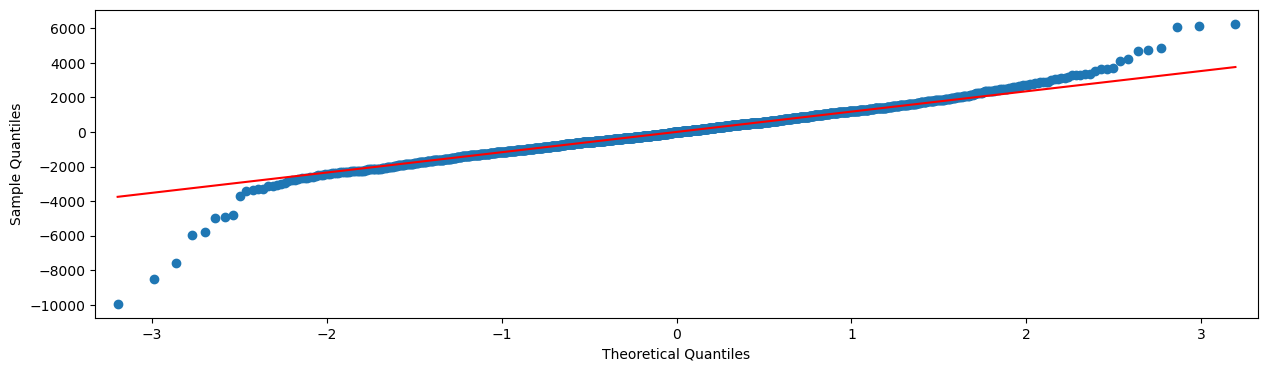

In [31]:
qqplot

In [32]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

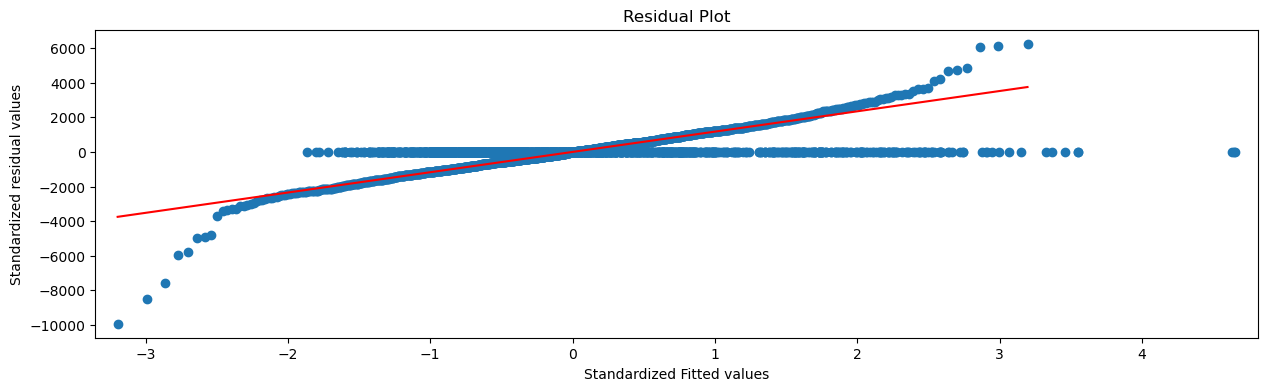

In [33]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


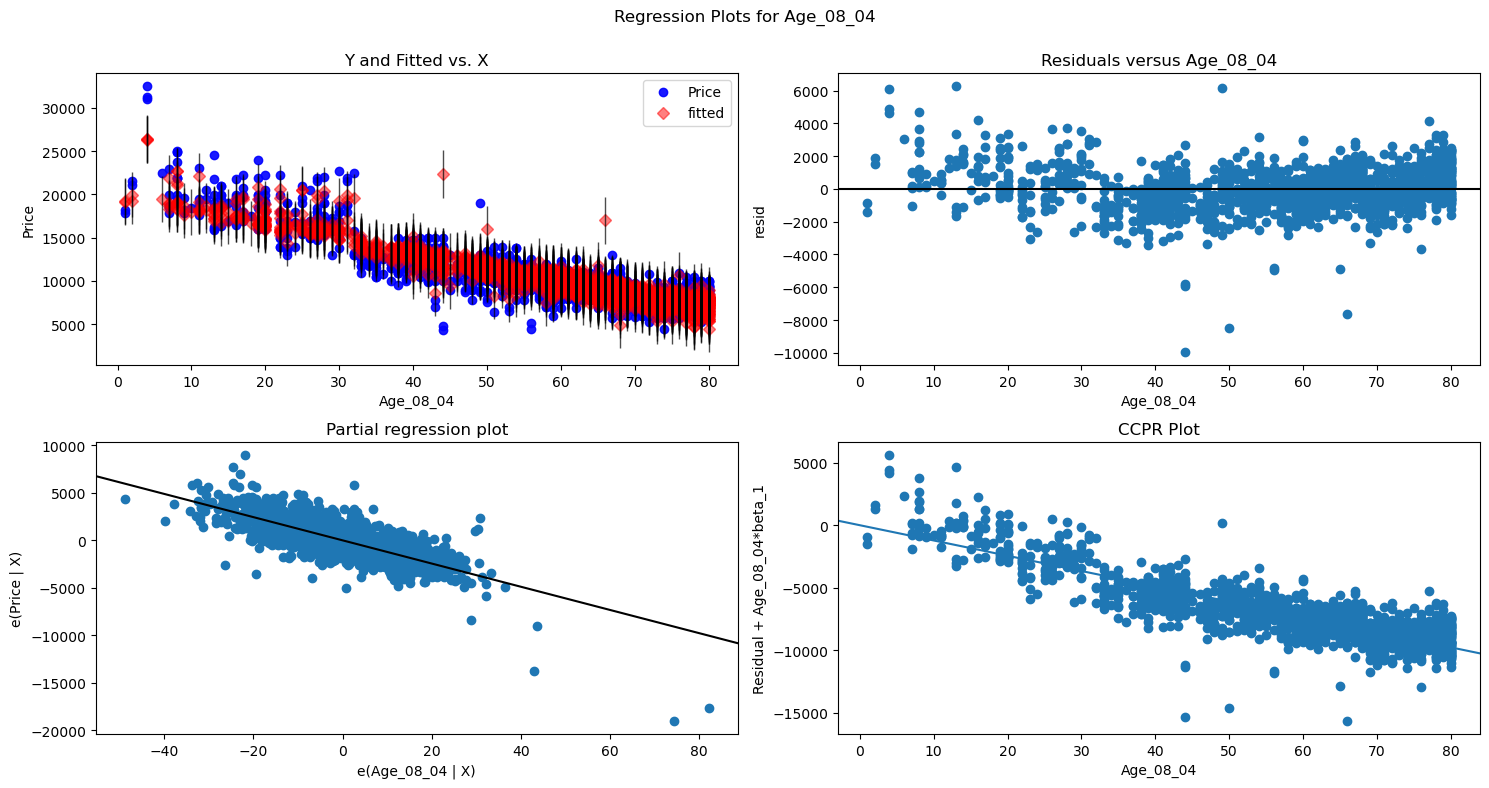

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

In [35]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

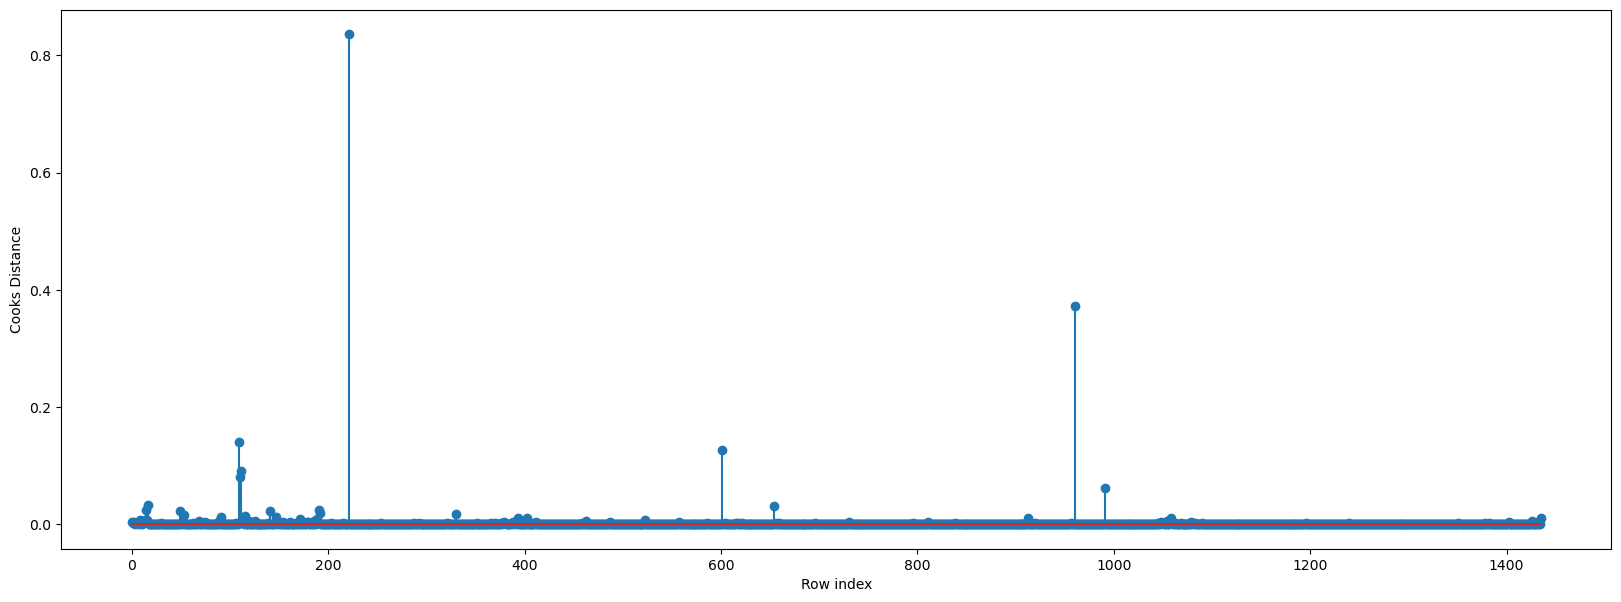

In [36]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars_cl)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.8359007508853531)

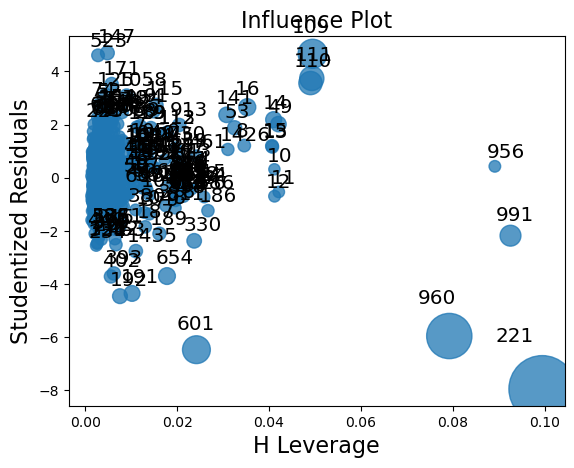

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [39]:
k = cars_cl.shape[1]
n = cars_cl.shape[0]
leverage_cutoff = 3*((k + 1)/n)